In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
fruits = pd.read_table('../../../Datasets/fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
lookup_fruit_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Create a train test split

In [5]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=0) # train_size =0.75 by default

In [6]:
X_train.shape

(44, 3)

In [7]:
y_train.shape

(44,)

In [8]:
X_test.shape

(15, 3)

In [9]:
y_test.shape

(15,)

## Feature Pair Plot

In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [11]:
plt.style.use('seaborn-deep')

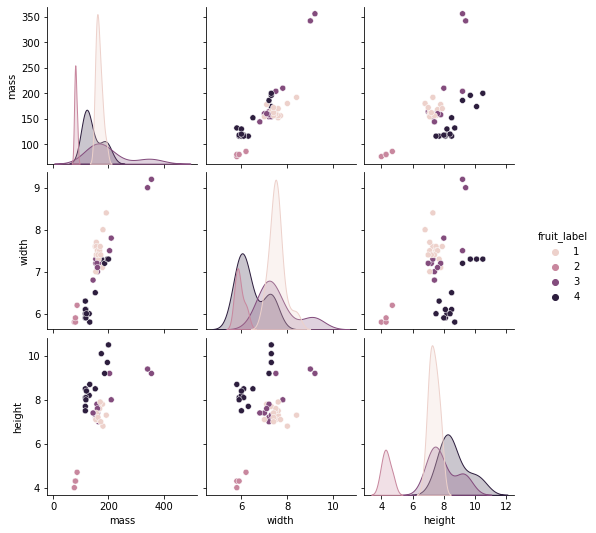

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data = X_train.join(y_train), hue = 'fruit_label', diag_kind = 'kde')

## Create a classifier object

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# creamos una instancia del objeto clasifier
knn = KNeighborsClassifier(n_neighbors=5)

## Train Classifier
We train the classifier using fit method (fir estimator)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Estimate de accuracy of the classifier on future data, using test data

In [15]:
knn.score(X_test, y_test)

0.5333333333333333

## Use the trained k-NN classifier model to classify new, previously unseen objects

In [16]:
X_test.head()

,mass,width,height
26,362,9.6,9.2
35,150,7.1,7.9
43,194,7.2,10.3
28,140,6.7,7.1
11,172,7.1,7.6


In [17]:
prediction = knn.predict([[50, 4.5, 6.8]])
lookup_fruit_name[prediction[0]]

/home/eduardo/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [18]:
prediction = knn.predict([[100, 6.5, 8.8]])
lookup_fruit_name[prediction[0]]

/home/eduardo/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

## Plot the decision boundaries of the kNN Classifier

In [19]:
#pip install graphviz

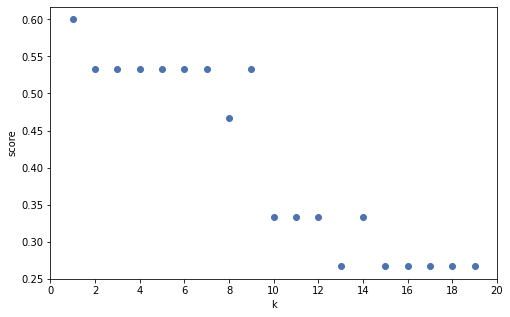

In [47]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
k_range = range(1,20)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(k_range, scores)
plt.xlabel('k')
plt.ylabel('score')
plt.xticks(range(0, 21, 2));

